<a href="https://colab.research.google.com/github/yoojiwonn/python_data/blob/main/tf_keras_DNN_iris_YJW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"  ### [중요!!] Colab의 경우, bmi.csv를 저장할 위치를 기록하시오.
df = pd.read_csv(dir + "iris.csv")    ### [중요!!] https://github.com/jjyjung/ai/blob/gh-pages/bmi.csv 에서 다운받을 수 있습니다.

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [4]:
# 몸무게와 키 데이터
df["sepal_length"] /= 100   # normalization
df["sepal_width"] /= 200   # normalization
df["petal_length"] /= 200   # normalization
df["petal_width"] /= 200   # normalization
# X = df[["sepal_lenth", "sepal_width","petal_length","petal_width"]].to_numpy()
X = df.iloc[:,0:4]
df
# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"Iris-setosa":[1,0,0], "Iris-virginica":[0,1,0], "Iris-versicolor":[0,0,1]}
y = np.empty((150,3))     # 150x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["iris_type"]):
    y[i] = bclass[v]        # "Iris-virginica"이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]

In [5]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(4,)))  # 입력 4개로부터 전달받는 9개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용
# model.add(layers.Dropout(0.1))


# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy'])  # 정확도 측정

In [20]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=3,     # 3개에 한 번씩 업데이터 실행
    epochs=500,          # 훈련 데이터셋을 총 500회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
        #validation data 분할 비율. 즉, 100개 중에서 20%인 20개를 validation용으로 분할
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)],  
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/500
27/27 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.3875 - val_loss: 1.1076 - val_accuracy: 0.2500
Epoch 2/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0907 - accuracy: 0.3875 - val_loss: 1.1080 - val_accuracy: 0.2500
Epoch 3/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0902 - accuracy: 0.3875 - val_loss: 1.1086 - val_accuracy: 0.2500
Epoch 4/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.3875 - val_loss: 1.1089 - val_accuracy: 0.2500
Epoch 5/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.3875 - val_loss: 1.1091 - val_accuracy: 0.2500
Epoch 6/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.3875 - val_loss: 1.1095 - val_accuracy: 0.2500
Epoch 7/500
27/27 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.3875 - val_loss: 1.1096 - val_accuracy: 0.2500
Epoch 8/500
2

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

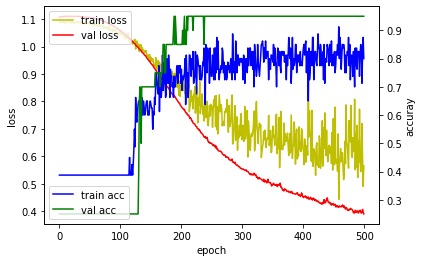

In [22]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [24]:
model.get_weights()

[array([[-0.19696689, -0.6041742 , -0.14081043, -0.45291257,  0.23733564,
         -0.69069076, -0.70110285, -0.27177227],
        [ 0.10682273,  0.05524576,  0.34421784,  0.07068348, -0.46610862,
         -0.47056347,  1.4429115 , -0.25654265],
        [-0.19099534, -0.5187931 , -0.2565647 , -0.00770074,  2.8656583 ,
          0.22244549, -3.5223744 ,  0.55393547],
        [-0.23968321, -0.40523368, -0.57773435,  0.24585366,  3.8554285 ,
          0.03590441, -3.8569388 ,  0.5749569 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.        , -0.02964206,
         0.        ,  0.14541265, -0.00316226], dtype=float32),
 array([[-0.28180546, -0.5524012 , -0.17222565, -0.27138776],
        [ 0.6576349 ,  0.69200045, -0.1328907 ,  0.04136848],
        [ 0.54625267, -0.6115737 ,  0.31654948,  0.5313706 ],
        [ 0.23094147, -0.1253668 , -0.10000163, -0.21747553],
        [-3.5900347 , -0.49037033, -0.6989807 , -0.518823  ],
        [ 0.36868054, -0.46719545,  0.534400

In [25]:
model.save(dir+"dnn_iris.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model(dir+"dnn_iris.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [26]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

2/2 [==============================] - 0s 6ms/step
[[7.90339410e-01 1.14216388e-03 2.08518401e-01]
 [2.77950708e-02 6.07773304e-01 3.64431649e-01]
 [2.79671066e-02 6.06476426e-01 3.65556449e-01]
 [3.66496444e-01 4.52908687e-02 5.88212729e-01]
 [2.77950708e-02 6.07773304e-01 3.64431649e-01]
 [8.32138956e-01 6.15086756e-04 1.67245880e-01]
 [8.76623511e-01 2.67813477e-04 1.23108670e-01]
 [8.47566605e-01 4.72780841e-04 1.51960701e-01]
 [4.24262993e-02 5.18266082e-01 4.39307600e-01]
 [2.78416146e-02 6.07421994e-01 3.64736408e-01]
 [8.29282254e-02 3.55608433e-01 5.61463237e-01]
 [8.33232105e-01 6.04166009e-04 1.66163862e-01]
 [1.68152556e-01 1.81481317e-01 6.50366127e-01]
 [8.20945740e-01 7.34734233e-04 1.78319424e-01]
 [5.68258911e-02 4.49786782e-01 4.93387371e-01]
 [2.77950708e-02 6.07773304e-01 3.64431649e-01]
 [3.07229795e-02 5.87631762e-01 3.81645262e-01]
 [1.64300293e-01 1.86747283e-01 6.48952484e-01]
 [1.83469415e-01 1.62171707e-01 6.54358983e-01]
 [8.39617372e-01 5.42954716e-04 1.598

array([0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 2, 1, 1, 0])

In [27]:
# 새로운 샘플의 클래스 예측하기
X_new = [5.7, 3.8, 1.7, 0.3]
X_new[0] /= 100   # normalization
X_new[1] /= 200   # normalization
X_new[2] /= 200   # normalization
X_new[3] /= 200   # normalization
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.057, 0.019, 0.0085, 0.0015]
1/1 [==============================] - 0s 30ms/step
[[0.7903394  0.00114216 0.2085184 ]] 0


In [28]:
type(X_test)

pandas.core.frame.DataFrame

In [29]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
100,0.057,0.0190,0.0085,0.0015
101,0.072,0.0180,0.0305,0.0125
102,0.063,0.0145,0.0280,0.0090
103,0.049,0.0120,0.0165,0.0050
104,0.077,0.0150,0.0305,0.0115


In [30]:
X_test.head(5).index.tolist()

[100, 101, 102, 103, 104]

In [31]:
X_test0 = X_test.loc[100]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

sepal_length    0.0570
sepal_width     0.0190
petal_length    0.0085
petal_width     0.0015
Name: 100, dtype: float64

1/1 [==============================] - 0s 39ms/step
[[0.7903394  0.00114216 0.2085184 ]] 0


In [32]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')